In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix

In [173]:
df = pd.read_csv('fertility_Diagnosis.txt', delimiter=',')
df

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 100 non-null    float64
 1   age                    100 non-null    float64
 2   child_diseases         100 non-null    int64  
 3   accident               100 non-null    int64  
 4   surgical_intervention  100 non-null    int64  
 5   high_fevers            100 non-null    int64  
 6   alcohol                100 non-null    float64
 7   smoking                100 non-null    int64  
 8   hrs_sitting            100 non-null    float64
 9   diagnosis              100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [175]:
df['diagnosis'].value_counts()

N    88
O    12
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

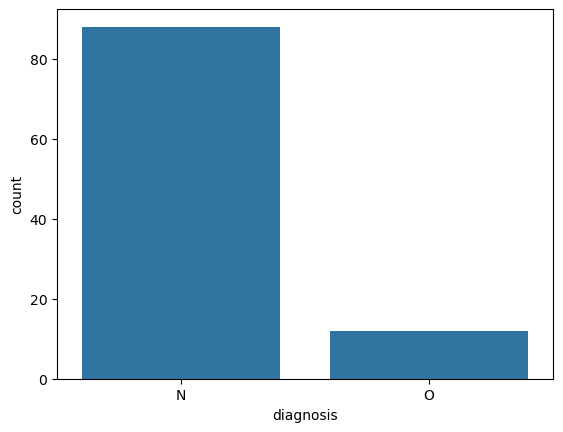

In [176]:
sns.countplot(df, x =df['diagnosis'])

In [177]:
df['diagnosis'] = df['diagnosis'].replace(['N', 'O'], ['Normal', 'Altered'])
df

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,Normal
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,Altered
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,Normal
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,Normal
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,Altered
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,Normal
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,Normal
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,Normal
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,Normal


In [178]:
X = df.drop('diagnosis', axis='columns')
X

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50
...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50
96,-1.00,0.61,1,0,0,0,0.8,0,0.50
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31
98,-1.00,0.64,1,0,1,0,1.0,0,0.19


In [179]:
y = df['diagnosis']
y

0      Normal
1     Altered
2      Normal
3      Normal
4     Altered
       ...   
95     Normal
96     Normal
97     Normal
98     Normal
99     Normal
Name: diagnosis, Length: 100, dtype: object

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, stratify=y)

In [181]:
y_test.value_counts()

Normal     18
Altered     2
Name: diagnosis, dtype: int64

Text(0, 0.5, 'count')

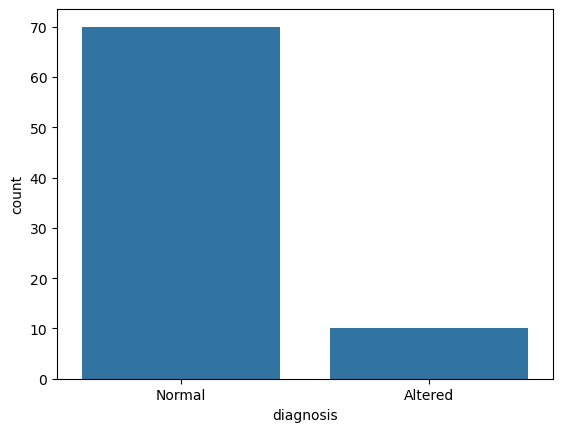

In [182]:
sns.barplot(y_train.value_counts())
plt.xlabel('diagnosis')
plt.ylabel('count')

In [183]:
training_data = pd.concat([X_train, y_train], axis = 1)
training_data

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,Normal
42,-1.00,0.58,1,0,1,-1,0.8,1,0.50,Normal
31,1.00,0.56,1,0,0,0,1.0,-1,0.44,Normal
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,Normal
21,1.00,0.75,1,0,0,0,0.6,0,0.25,Normal
...,...,...,...,...,...,...,...,...,...,...
28,1.00,0.58,0,0,1,0,1.0,-1,0.19,Normal
99,-1.00,0.69,0,1,1,0,0.6,-1,0.19,Normal
84,-0.33,0.78,1,0,0,1,1.0,1,0.06,Altered
73,-1.00,0.50,1,0,0,1,0.8,-1,0.44,Normal


In [184]:
training_data['diagnosis'].value_counts()

Normal     70
Altered    10
Name: diagnosis, dtype: int64

In [185]:
clf = DecisionTreeClassifier(criterion = 'gini')

In [186]:
param_grid = {
    'max_depth': range(1, 8),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Custom F1 scorer with pos_label set to 'Normal'
f1_scorer = make_scorer(f1_score, pos_label='Normal', average= 'weighted')

# Stratified K-Fold cross-validation
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=f1_scorer, cv=strat_k_fold, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated F1 Score: {best_score}")


Best Parameters: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validated F1 Score: 0.8166666666666667


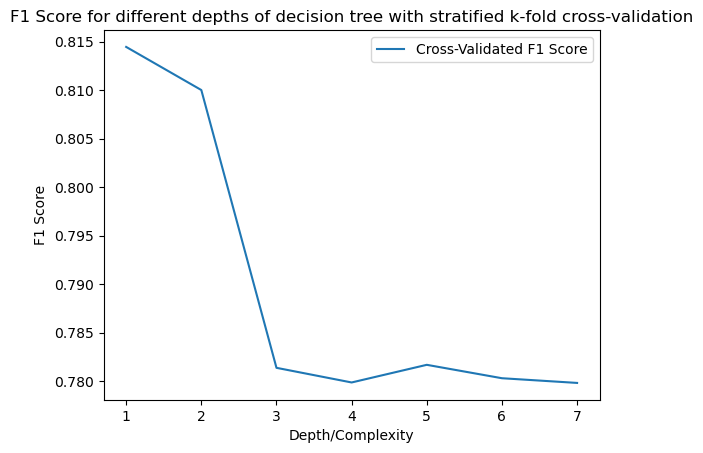

In [187]:
depths = range(1, 8)
mean_test_scores = []

for depth in depths:
    indices = [i for i, param in enumerate(grid_search.cv_results_['params']) if param['max_depth'] == depth]
    mean_test_scores.append(np.mean(grid_search.cv_results_['mean_test_score'][indices]))

plt.figure()
plt.plot(depths, mean_test_scores, label='Cross-Validated F1 Score')
plt.xlabel('Depth/Complexity')
plt.ylabel('F1 Score')
plt.title('F1 Score for different depths of decision tree with stratified k-fold cross-validation')
plt.legend()
plt.show()

In [188]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
y_pred

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal'], dtype=object)

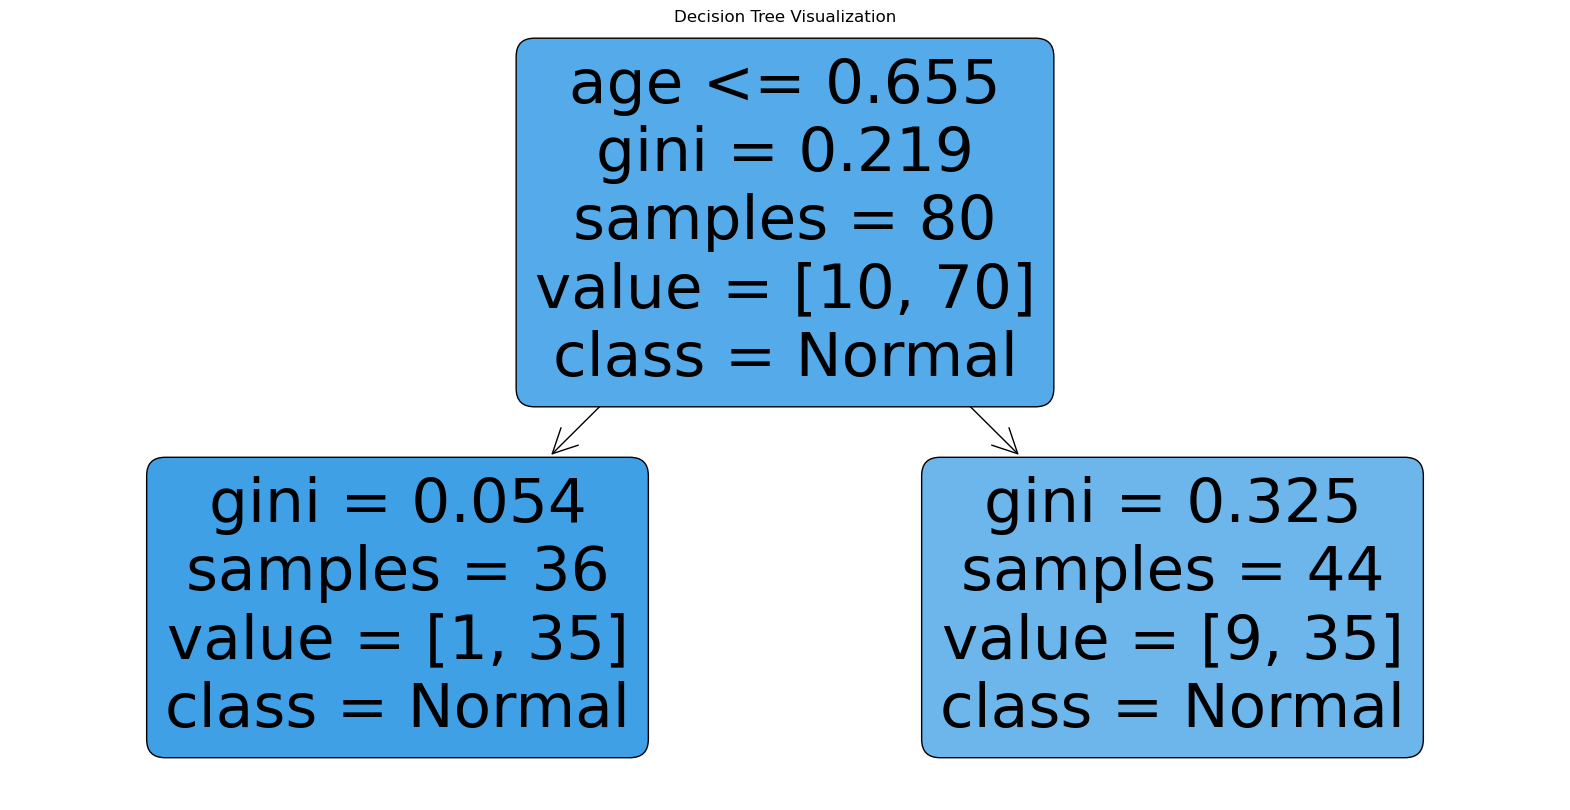

In [189]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=list(X_train.columns), class_names=['Altered', 'Normal'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [190]:
print(classification_report(y_test, y_pred, target_names=['Altered', 'Normal'], zero_division=1))
weighted_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Weighted F1 Score: {weighted_f1}")

              precision    recall  f1-score   support

     Altered       1.00      0.00      0.00         2
      Normal       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.95      0.50      0.47        20
weighted avg       0.91      0.90      0.85        20

Weighted F1 Score: 0.8526315789473685


Text(50.722222222222214, 0.5, 'True')

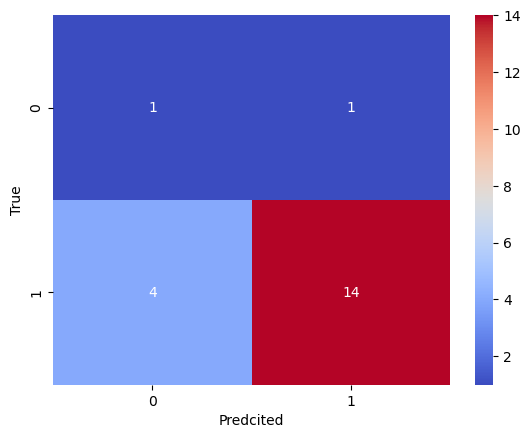

In [191]:
sns.heatmap(confusionMatrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predcited')
plt.ylabel('True')

In [192]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Weighted F1 Score: {best_score}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validated Weighted F1 Score: 0.8419688644688644


Text(0, 0.5, 'count')

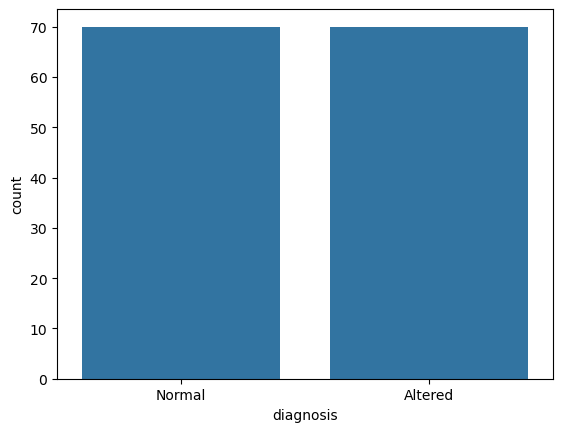

In [193]:
sns.barplot(y_train_resampled.value_counts())
plt.xlabel('diagnosis')
plt.ylabel('count')

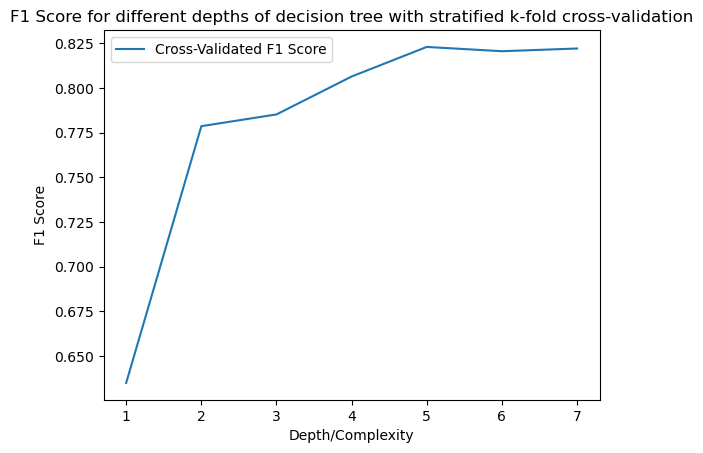

In [194]:
depths = range(1, 8)
mean_test_scores = []

for depth in depths:
    indices = [i for i, param in enumerate(grid_search.cv_results_['params']) if param['max_depth'] == depth]
    mean_test_scores.append(np.mean(grid_search.cv_results_['mean_test_score'][indices]))

plt.figure()
plt.plot(depths, mean_test_scores, label='Cross-Validated F1 Score')
plt.xlabel('Depth/Complexity')
plt.ylabel('F1 Score')
plt.title('F1 Score for different depths of decision tree with stratified k-fold cross-validation')
plt.legend()
plt.show()

In [195]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate the model's performance on the test set
y_pred = best_clf.predict(X_test)

# Print classification report with zero_division set to 1
print(classification_report(y_test, y_pred, target_names=['Altered', 'Normal'], zero_division=1))

# Calculate and print weighted F1 score with zero_division set to 1
weighted_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Weighted F1 Score: {weighted_f1}")

              precision    recall  f1-score   support

     Altered       0.29      1.00      0.44         2
      Normal       1.00      0.72      0.84        18

    accuracy                           0.75        20
   macro avg       0.64      0.86      0.64        20
weighted avg       0.93      0.75      0.80        20

Weighted F1 Score: 0.7992831541218638


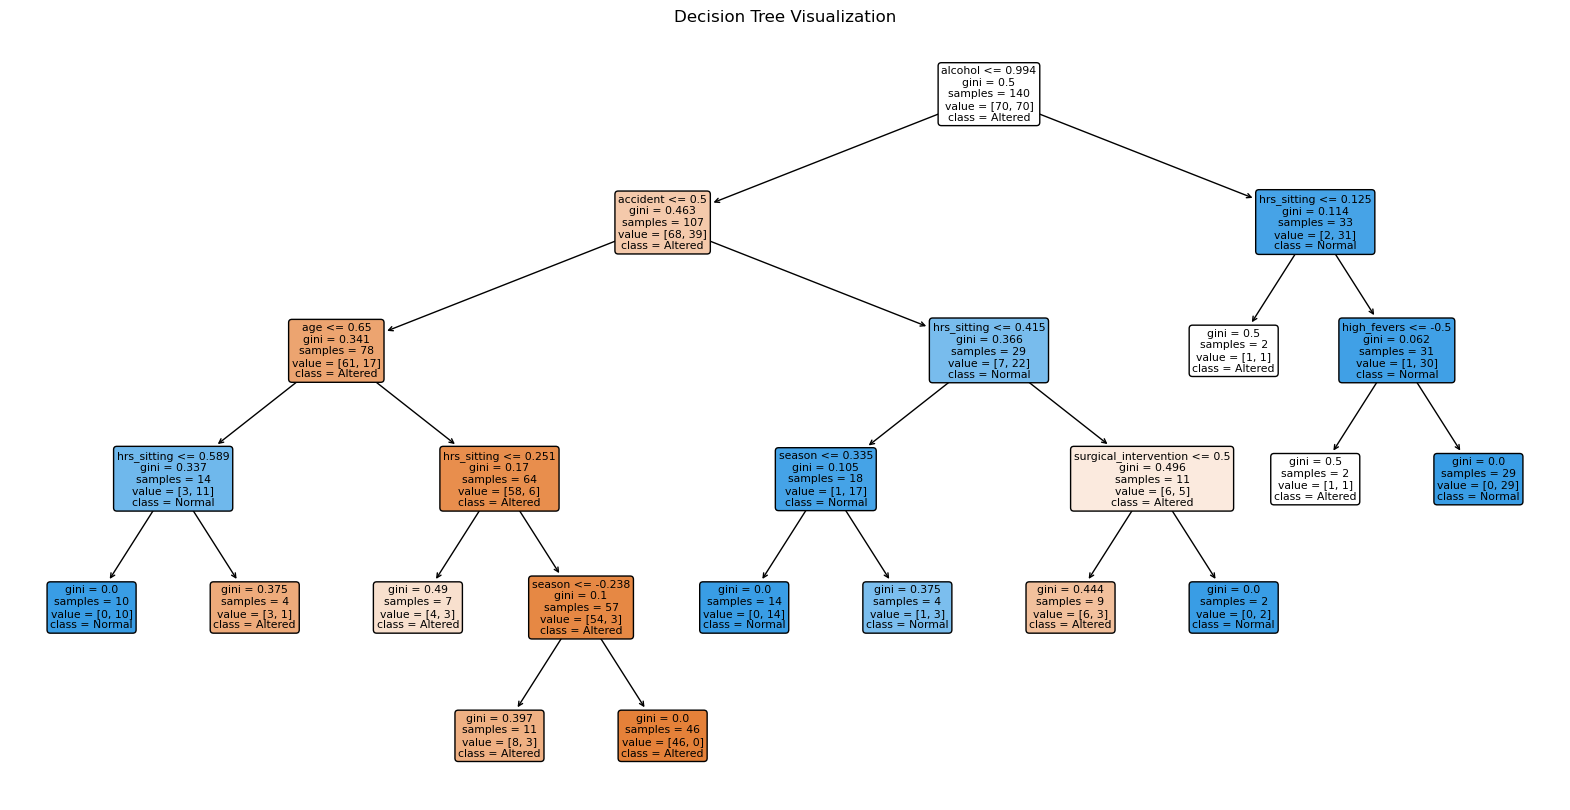

In [196]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=list(X_train.columns), class_names=['Altered', 'Normal'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [197]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[ 2,  0],
       [ 5, 13]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

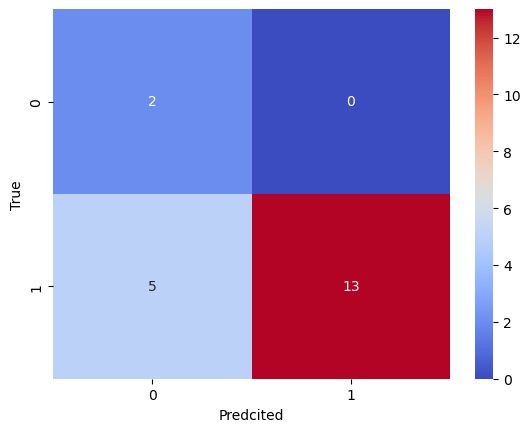

In [198]:
sns.heatmap(confusionMatrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predcited')
plt.ylabel('True')